PV-202 Aladib Yazan

Lab Work № 1. On the growth of COVID-19 cases

From November 2020 to February 2021

In [1]:
import math
from datetime import date
from itertools import product

import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
from scipy.stats import norm, stats
from scipy.stats import chisquare

df = pd.read_csv('covid-data.csv', ).sort_values('date', ascending=True)
df

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
419,2020-01-13,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,1,0,0
418,2020-01-14,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
417,2020-01-15,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
416,2020-01-16,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
415,2020-01-17,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-03-03,508665.0,2449,45214.0,9359.0,2172,45462.0,770821.0,73857281.0,267001,4260.0,3094.0,28520365.0,66836,56,357888671,1406795
3,2021-03-04,510408.0,1743,45293.0,8970.0,1530,44172.0,772351.0,74035238.0,177957,4267.0,2973.0,28585852.0,65487,56,359479655,1590984
2,2021-03-05,512629.0,2221,45373.0,8634.0,2781,42541.0,775132.0,74307155.0,271917,4275.0,2889.0,28654639.0,68787,56,361224072,1744417
1,2021-03-06,514309.0,1680,45453.0,8409.0,503,41401.0,775635.0,74450990.0,143835,4280.0,2811.0,28714654.0,60015,56,362655064,1430992


Obtaining daily case data for a specific period

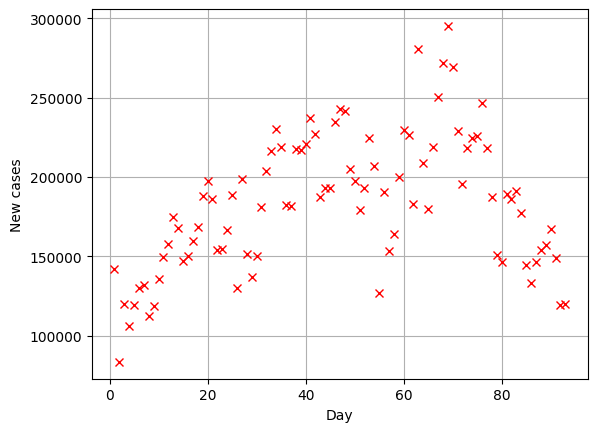

In [2]:
start_date = date(2020, 11, 1)
end_date = start_date + relativedelta(months=3)

# Filtering dataframe by date
df = df[df.apply(lambda row: start_date <= date.fromisoformat(row['date']) <= end_date, axis=1)]

x = df['positiveIncrease'].to_numpy()
t = np.array(range(1, len(x)+1))

plt.xlabel("Day")
plt.ylabel("New cases")
plt.grid()
plt.plot(t, x, "rx")

Logarithmizing the data (reducing to a linear model), calculating means

In [3]:
y = np.array(list(map(math.log, x)))
ty = t * y

t_mean = t.mean()
y_mean = y.mean()
ty_mean = ty.mean()

Computing covariance

In [4]:
cov = ty_mean - t_mean * y_mean

Computing variance of t

In [5]:
t2 = t ** 2
dt = t2.mean() - t_mean ** 2

Computing regression coefficients

In [6]:
b = cov / dt
a = y_mean - b * t_mean
A = math.exp(a)
print(b, A)

0.0030866538277854313 154030.24281708512


Approximation graph

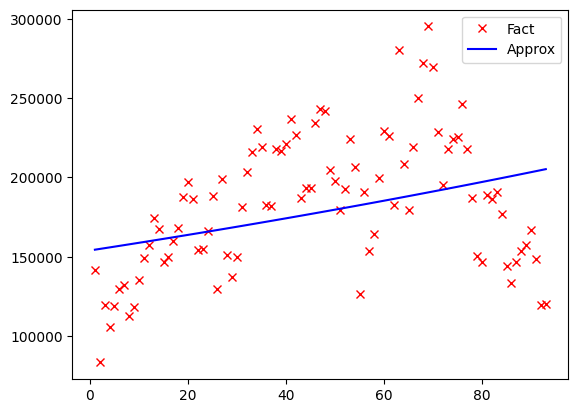

In [7]:
z = np.array(list(map(lambda ti: A * math.exp(b * ti), t)))

plt.plot(t, x, 'rx', label='Fact')
plt.plot(t, z, 'b-', label='Approx')
plt.legend()
plt.show()

Testing the hypothesis about the type of distribution using the chi-squared test

In [8]:
eps = A * np.array(list(map(lambda ti: math.exp(b * ti), t))) - x
eps2 = eps ** 2

sigma = math.sqrt(eps2.mean() - eps.mean())

s = math.trunc(math.log2(len(x))) + 1

# Splitting into intervals
step = (eps.max() - eps.min()) / s
edges = [eps.min()]

for i in range(1, s + 1):
    edges.append(edges[i-1] + step)

edges[0] = -math.inf
edges.append(math.inf)

# Computing actual frequencies
count = [0] * len(edges)

for i, j in product(range(1, len(edges)), eps):
    if edges[i-1] <= j < edges[i]:
        count[i] += 1

count.pop(0)

# Computing theoretical frequencies
p = [norm.cdf(edges[i] / sigma) - norm.cdf(edges[i-1] / sigma) for i in range(1, len(edges))]
n_t = np.array(p) * len(t)

k, p = chisquare(count, n_t, ddof=1)
# k, p = stats.chisquare(count, n_t, ddof=1)

print('k =', k)
print('p =', p)

if p > 0.05:
    print('Hypothesis is confirmed')
else:
    print('Hypothesis is not confirmed')

k = 4.1196181625468125
p = 0.6604926118456349
Hypothesis is confirmed
